In [1]:

from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("train_and_test2.csv")
dataset.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
dataset=dataset.drop("Passengerid",axis=1)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   zero      1309 non-null   int64  
 5   zero.1    1309 non-null   int64  
 6   zero.2    1309 non-null   int64  
 7   zero.3    1309 non-null   int64  
 8   zero.4    1309 non-null   int64  
 9   zero.5    1309 non-null   int64  
 10  zero.6    1309 non-null   int64  
 11  Parch     1309 non-null   int64  
 12  zero.7    1309 non-null   int64  
 13  zero.8    1309 non-null   int64  
 14  zero.9    1309 non-null   int64  
 15  zero.10   1309 non-null   int64  
 16  zero.11   1309 non-null   int64  
 17  zero.12   1309 non-null   int64  
 18  zero.13   1309 non-null   int64  
 19  zero.14   1309 non-null   int64  
 20  Pclass    1309 non-null   int6

In [5]:
dataset.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
zero        0
zero.1      0
zero.2      0
zero.3      0
zero.4      0
zero.5      0
zero.6      0
Parch       0
zero.7      0
zero.8      0
zero.9      0
zero.10     0
zero.11     0
zero.12     0
zero.13     0
zero.14     0
Pclass      0
zero.15     0
zero.16     0
Embarked    2
zero.17     0
zero.18     0
2urvived    0
dtype: int64

In [6]:
dataset=dataset.dropna()

In [7]:
dataset.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
zero        0
zero.1      0
zero.2      0
zero.3      0
zero.4      0
zero.5      0
zero.6      0
Parch       0
zero.7      0
zero.8      0
zero.9      0
zero.10     0
zero.11     0
zero.12     0
zero.13     0
zero.14     0
Pclass      0
zero.15     0
zero.16     0
Embarked    0
zero.17     0
zero.18     0
2urvived    0
dtype: int64

In [30]:
dataset=dataset.drop(["zero","zero.1","zero.2","zero.3","zero.4","zero.5","zero.6"
                   ,"zero.7","zero.8","zero.9","zero.10","zero.11","zero.12",
                   "zero.13","zero.14","zero.15","zero.16","zero.17","zero.18"],axis=1)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1307 non-null   float64
 1   Fare      1307 non-null   float64
 2   Sex       1307 non-null   int64  
 3   sibsp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Pclass    1307 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1307 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 131.9 KB


In [32]:
y=dataset["2urvived"]
x=dataset.drop("2urvived",axis=1)

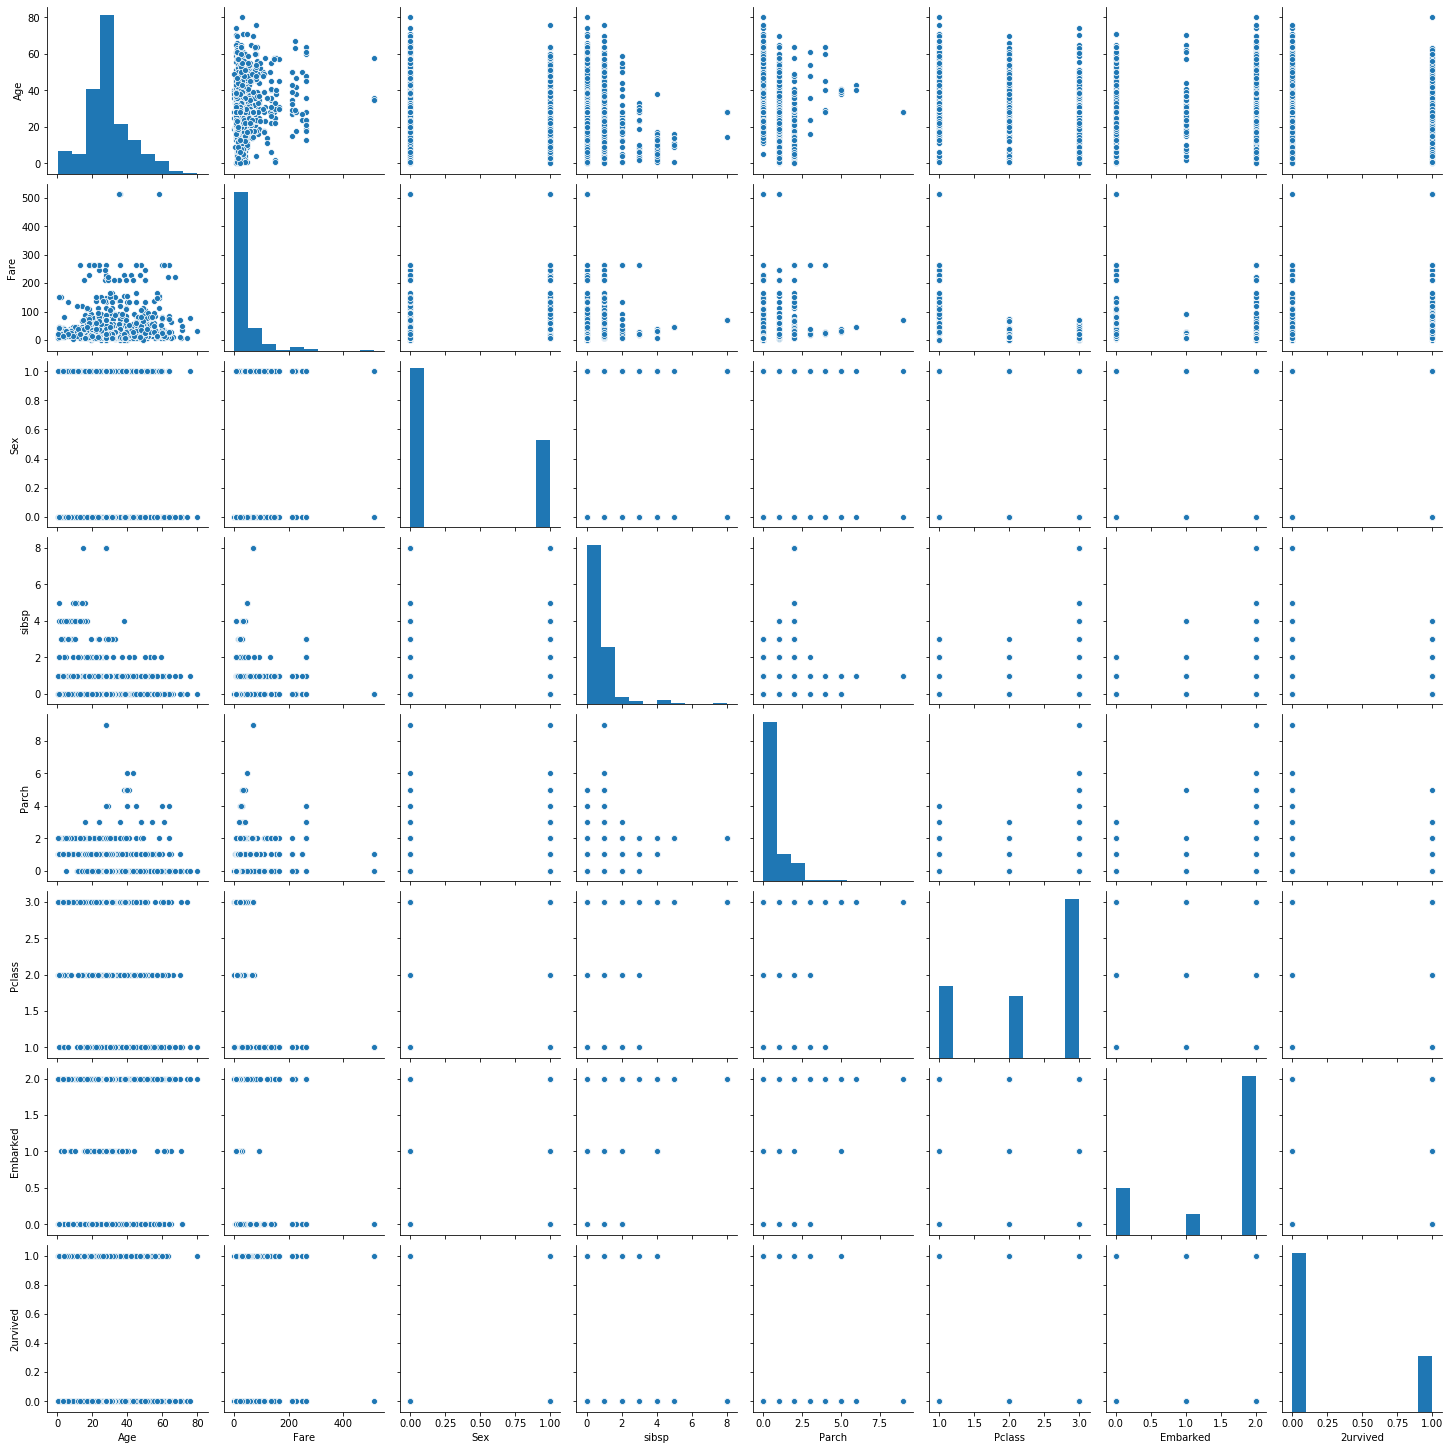

In [33]:
import seaborn as sns
sns.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


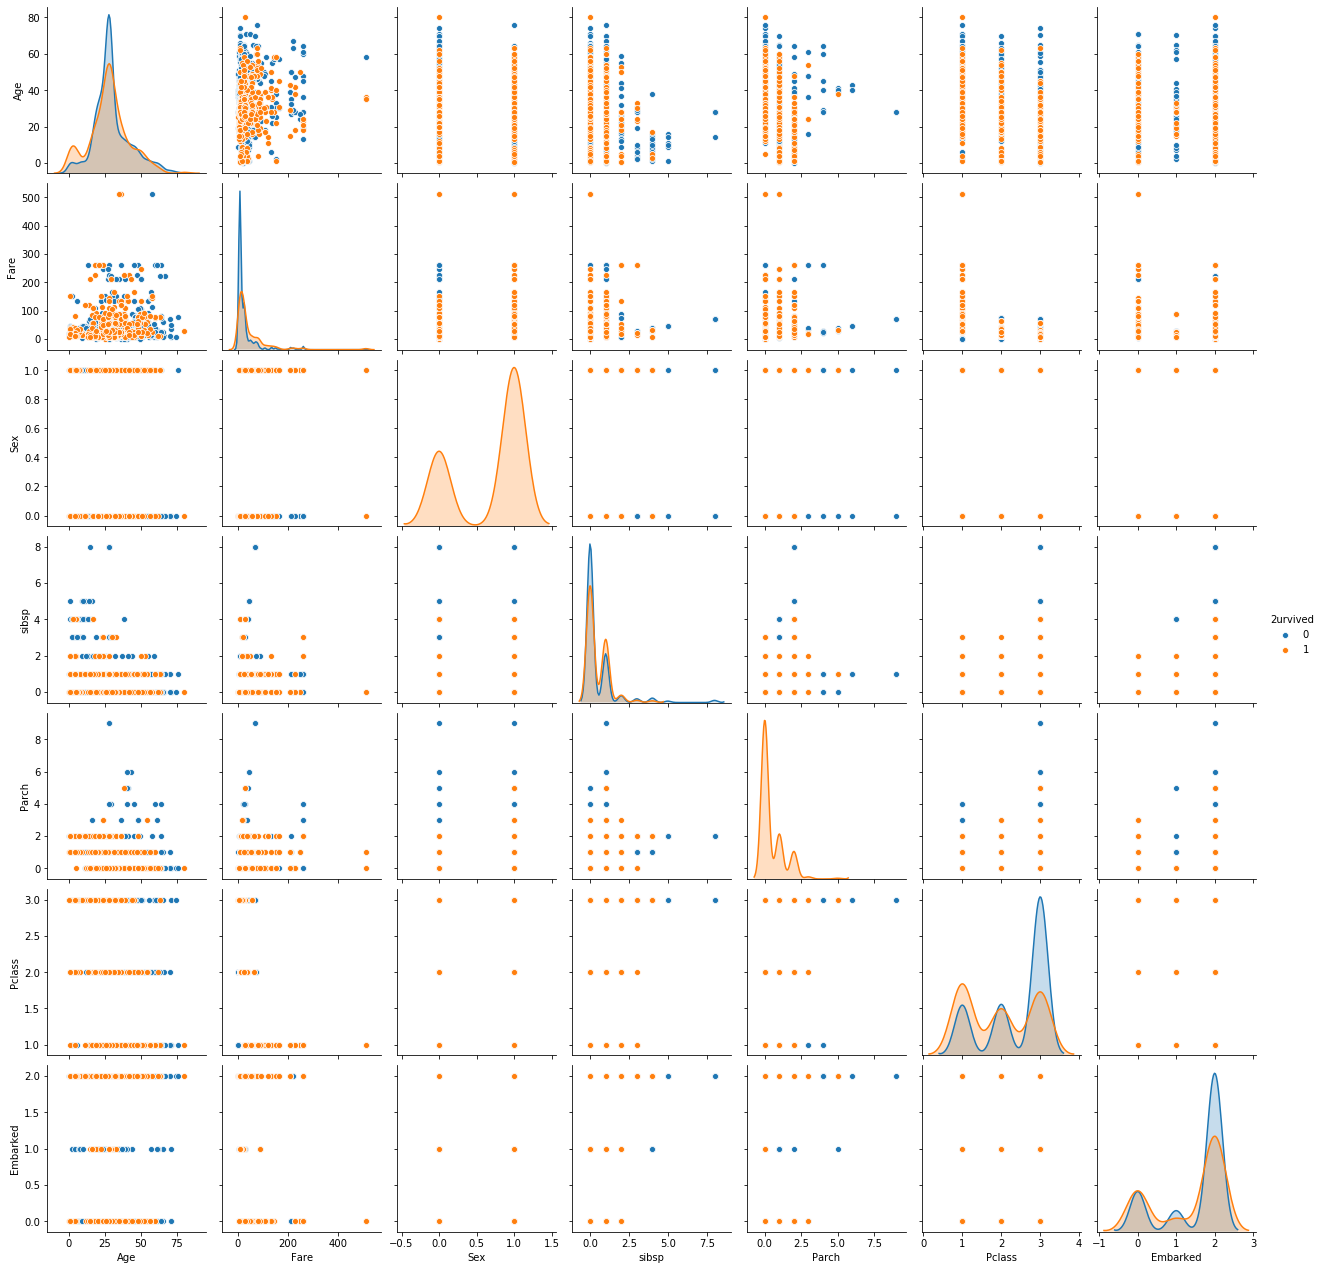

In [34]:
sns.pairplot(dataset,hue="2urvived")

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [49]:
reg=linear_model.LogisticRegression(C=0.5)
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [51]:
accuracy_score(y_predict,y_test)

0.7708333333333334

In [52]:
confusion_matrix(y_predict,y_test)

array([[295,  76],
       [ 23,  38]])